## Section 2: Coding Questions

This section consists of coding questions. The total mark for this section is **85**.
The task we are considering in this section is the text classification task. In this section, some code has been provided to help you get started. For each cell marked with **# Insert your code here**, these are placeholders where you **must** supply your own codes when instructed.
This section consists of 5 parts:
* Part 0: Downloading and preprocessing data. This part has been completed. No marks are allocated for this part.
* Part 1: Coding assessment on using Word2Vect to transform texts to vectors (20 marks).
* Part 2: Coding assessment on Text CNN for sequence modeling and neural embedding (10 marks).
* Part 3: Coding assessment on RNNs for sequence modeling and neural embedding (32 marks).
* Part 4: Coding assessment on Transformer for sequence modeling and neural embedding and the overall ranking (23 marks).

## <span style="color:#0b486b">Set random seeds</span>

We start with importing tensorflow and numpy and setting random seeds for TF and numpy. You can use any seeds you prefer.

In [1]:
import numpy as np
import tensorflow as tf

tf.random.set_seed(6789)
np.random.seed(6789)

## <span style="color:#0b486b">Part 0: Download and preprocess the data</span>

<div style="text-align: right"><span style="color:red; font-weight:bold"><span></div>

The dataset we use for this assignment is a question classification dataset for which the training set consists of $5,500$ questions belonging to 6 coarse question categories including:
- abbreviation (ABBR),
- entity (ENTY),
- description (DESC),
- human (HUM),
- location (LOC) and
- numeric (NUM).

In this assignment, we will utilize a subset of this dataset, containing $2,000$ questions for training and validation. We will use 80% of those 2000 questions for trainning and the rest for validation.


Preprocessing data is a crucial initial step in any machine learning or deep learning project. The *TextDataManager* class simplifies the process by providing functionalities to download and preprocess data specifically designed for the subsequent questions in this assignment. It is highly recommended to gain a comprehensive understanding of the class's functionality by **carefully reading** the content provided in the *TextDataManager.py* file before proceeding to answer the questions in Part 1.

In [2]:
from TextDataManager import SimpleTextDataset as DataManager

print('Loading data...')
DataManager.maybe_download("data", "train_2000.label", "http://cogcomp.org/Data/QA/QC/")

dm = DataManager(maxlen=100)
dm.read_data("data/", ["train_2000.label"])

Loading data...
Downloaded successfully train_2000.label

Sample questions and corresponding labels... 

['manner how did serfdom develop in and then leave russia ?', 'cremat what films featured the character popeye doyle ?', "manner how can i find a list of celebrities ' real names ?", 'animal what fowl grabs the spotlight after the chinese year of the monkey ?', 'exp what is the full form of .com ?']
['DESC', 'ENTY', 'DESC', 'ENTY', 'ABBR']


In [3]:
dm.manipulate_data()
dm.train_valid_split(train_ratio=0.8)

In [ ]:
print(dm.train_str_questions)
print(dm.train_numeral_data.shape)
print(dm.valid_numeral_data.shape)
print(dm.train_numeral_labels.shape)

['manner how did serfdom develop in and then leave russia ?', 'cremat what films featured the character popeye doyle ?', "manner how can i find a list of celebrities ' real names ?", 'animal what fowl grabs the spotlight after the chinese year of the monkey ?', 'exp what is the full form of .com ?', 'ind what contemptible scoundrel stole the cork from my lunch ?', "gr what team did baseball 's st. louis browns become ?", 'title what is the oldest profession ?', 'def what are liver enzymes ?', 'ind name the scar-faced bounty hunter of the old west .', 'date when was ozzy osbourne born ?', 'reason why do heavier objects travel downhill faster ?', 'ind who was the pride of the yankees ?', 'ind who killed gandhi ?', 'event what is considered the costliest disaster the insurance industry has ever faced ?', 'state what sprawling u.s. state boasts the most airports ?', 'desc what did the only repealed amendment to the u.s. constitution deal with ?', 'count how many jews were executed in conce

You now have a data manager, named *dm* containing the training and validiation sets in both text and numeric forms. Your task is to play around and read this code to figure out the meanings of some important attributes that will be used in the next parts.

## <span style="color:#0b486b">Part 1: Using Word2Vect to transform texts to vectors </span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 20 marks]<span></div>

In this part, you will be assessed on how to use a pretrained Word2Vect model for realizing a machine learning task. Basically, you will use this pretrained Word2Vect to transform the questions in the above dataset stored in the *data manager object dm* to numeric form for training a classifier using Logistic Regression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [4]:
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

#### <span style="color:red">**Question 1.1**</span>
**Write code to download the pretrained model *glove-wiki-gigaword-100*. Note that this model transforms a word in its dictionary to a $100$ dimensional vector.**

**Write code for the function *get_word_vector(word, model)* used to transform a word to a vector using the pretrained Word2Vect model *model*. Note that for a word not in the vocabulary of our *word2vect*, you need to return a vector $0$ with 100 dimensions.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [5]:
word2vect = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
word2vect.get_vector("hello")

array([ 0.26688  ,  0.39632  ,  0.6169   , -0.77451  , -0.1039   ,
        0.26697  ,  0.2788   ,  0.30992  ,  0.0054685, -0.085256 ,
        0.73602  , -0.098432 ,  0.5479   , -0.030305 ,  0.33479  ,
        0.14094  , -0.0070003,  0.32569  ,  0.22902  ,  0.46557  ,
       -0.19531  ,  0.37491  , -0.7139   , -0.51775  ,  0.77039  ,
        1.0881   , -0.66011  , -0.16234  ,  0.9119   ,  0.21046  ,
        0.047494 ,  1.0019   ,  1.1133   ,  0.70094  , -0.08696  ,
        0.47571  ,  0.1636   , -0.44469  ,  0.4469   , -0.93817  ,
        0.013101 ,  0.085964 , -0.67456  ,  0.49662  , -0.037827 ,
       -0.11038  , -0.28612  ,  0.074606 , -0.31527  , -0.093774 ,
       -0.57069  ,  0.66865  ,  0.45307  , -0.34154  , -0.7166   ,
       -0.75273  ,  0.075212 ,  0.57903  , -0.1191   , -0.11379  ,
       -0.10026  ,  0.71341  , -1.1574   , -0.74026  ,  0.40452  ,
        0.18023  ,  0.21449  ,  0.37638  ,  0.11239  , -0.53639  ,
       -0.025092 ,  0.31886  , -0.25013  , -0.63283  , -0.0118

In [ ]:
def get_word_vector(word, model):
    try:
        vector = model.get_vector(word)
    except: # word not in the vocabulary
        vector = np.zeros(100)
    return vector

#### <span style="color:red">**Question 1.2**</span>

**Write the code for the function `get_sentence_vector(sentence, important_score=None, model= None)`. Note that this function will transform a sentence to a 100-dimensional vector using the pretrained model *model*. In addition, the list *important_score* which has the same length as the *sentence* specifies the important scores of the words in the sentence. In your code, you first need to apply *softmax* function over *important_score* to obtain the important weight *important_weight* which forms a probability over the words of the sentence. Furthermore, the final vector of the sentence will be weighted sum of the individual vectors for words and the weights in *important_weight*.**
- $important\_weight = softmax(important\_score)$.
- $final\_vector= important\_weight[1]\times v[1] + important\_weight[2]\times v[2] + ...+ important\_weight[T]\times v[T]$ where $T$ is the length of the sentence and $v[i]$ is the vector representation of the $i-th$  word in this sentence.

**Note that if `important_score=None` is set by default, your function should return the average of all representation vectors corresponding to set `important_score=[1,1,...,1]`.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
def get_sentence_vector(sentence, important_score=None, model=None):
    words = sentence.split() # break the sentence into words
    word_embeddings = np.zeros((len(sentence), 100))  # num_words_in_a_sentence * embedding_size

    # convert each word into its embedding
    for j, word in enumerate(words):
        word_embeddings[j, :] = get_word_vector(word, word2vect)

    if important_score is None:
        important_score = np.ones(len(word_embeddings))

    important_weight = tf.nn.softmax(important_score).numpy()
    sentence_normalized = word_embeddings*important_weight.reshape((-1, 1))
    return np.sum(sentence_normalized, axis=0).flatten()

#### <span style="color:red">**Question 1.3**</span>

**Write code to transform questions in *dm.train_str_questions* and *dm.valid_str_questions* to feature vectors. Note that after running the following cells, you must have $X\_train$ and $X\_valid$ which are two numpy arrays of the feature vectors and $y\_train$ and $y\_valid$ which are two arrays of numeric labels (Hint: *dm.train_numeral_labels* and *dm.valid_numeral_labels*). You can add more lines to the following cells if necessary. In addition, you should decide the *important_score* by yourself. For example, you might reckon that the 1st score is 1, the 2nd score is decayed by 0.9, the 3rd is decayed by 0.9, and so on.**

<div style="text-align: right"><span style="color:red">[4 marks]</span></div>

In [ ]:
def convert_sentences_to_embeddings(sentences):
    num_sentences = len(sentences)
    sentence_embeddings = np.zeros((num_sentences, 100))

    for i, sentence in enumerate(sentences):
        sentence_embedding = get_sentence_vector(sentence)
        sentence_embeddings[i, :] = sentence_embedding
    return sentence_embeddings

In [ ]:
print("Transform training set to feature vectors...")
X_train = convert_sentences_to_embeddings(dm.train_str_questions)
y_train = dm.train_numeral_labels

Transform training set to feature vectors...


In [ ]:
print("Transform validation set to feature vectors...")
X_valid = convert_sentences_to_embeddings(dm.valid_str_questions)
y_valid = dm.valid_numeral_labels

Transform validation set to feature vectors...


#### <span style="color:red">**Question 1.4**</span>

**It is now to use *MinMaxScaler(feature_range=(-1,1))* in scikit-learn to scale both training and validation sets to the range $(-1,1)$.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_valid)
X_valid = scaler.transform(X_valid)

#### <span style="color:red">**Question 1.5**</span>
**Train a Logistic Regression model on the training set and then evaluate on the validation set.**
<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Insert your code for training here

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Insert your code for validation here
y_pred = model.predict(X_valid)
ac = accuracy_score(y_valid, y_pred)
cm = confusion_matrix(y_valid, y_pred)

print("accuracy")
print(ac)

print("======")
print(cm)

accuracy
0.775
[[ 3  3  0  0  0  0]
 [ 0 83  2  0  2  0]
 [ 1 21 66  0  6  5]
 [ 0  8 12 64  1  0]
 [ 1  4  9  0 44  2]
 [ 0  2 11  0  0 50]]


### **Embedding visualization**

**As you know, the embedding matrix is a collection of embedding vectors, each is for one word. In this part, you will base on the cosine similarity of the embedding vectors for the words to find the top-k most relevant words for a given word.**

**Good embeddings should have words close in meaning near each other by some similarity metrics. The similarity metric we'll use is the `consine` similarity, which is defined for two vector $\mathbf{u}$ and $\mathbf{v}$ as $\cos(\mathbf{u}, \mathbf{v})=\frac{\mathbf{u} \cdot \mathbf{v}}{\left\Vert{\mathbf{u}}\right\Vert\left\Vert{\mathbf{v}}\right\Vert}$ where $\cdot$ means dot product and $\left\Vert\cdot\right\Vert$ means the $L^2$ norm.**

In [ ]:
def cosine_similarity(u,v):
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

#### <span style="color:red">**Question 1.6** </span>

**Write code for the `function find_most_similar(word=None, k=5, model=None)` which returns a list of the top-`k` most similar words (in descending order) for a given word. This similarity is based on the cosine similarity of embedding vectors obtained from the pretrained model `glove-wiki-gigaword-100` (see Question 1.1). The parameter `include_cur_word` specifies whether the given word should be included in the returned output or not. This means that if `include_cur_word=True`, the function will return `k+1` words.**

<div style="text-align: right"><span style="color:red">[3 marks]</span></div>

In [ ]:
def topk(scores, k):
    # runs in O(n) worst case
    topk_unordered = np.argpartition(scores, -k)[-k:]
    topk = topk_unordered[np.argsort(-scores[topk_unordered])]
    return topk

In [ ]:
word2vect.get_vector("computer")

array([-1.6298e-01,  3.0141e-01,  5.7978e-01,  6.6548e-02,  4.5835e-01,
       -1.5329e-01,  4.3258e-01, -8.9215e-01,  5.7747e-01,  3.6375e-01,
        5.6524e-01, -5.6281e-01,  3.5659e-01, -3.6096e-01, -9.9662e-02,
        5.2753e-01,  3.8839e-01,  9.6185e-01,  1.8841e-01,  3.0741e-01,
       -8.7842e-01, -3.2442e-01,  1.1202e+00,  7.5126e-02,  4.2661e-01,
       -6.0651e-01, -1.3893e-01,  4.7862e-02, -4.5158e-01,  9.3723e-02,
        1.7463e-01,  1.0962e+00, -1.0044e+00,  6.3889e-02,  3.8002e-01,
        2.1109e-01, -6.6247e-01, -4.0736e-01,  8.9442e-01, -6.0974e-01,
       -1.8577e-01, -1.9913e-01, -6.9226e-01, -3.1806e-01, -7.8565e-01,
        2.3831e-01,  1.2992e-01,  8.7721e-02,  4.3205e-01, -2.2662e-01,
        3.1549e-01, -3.1748e-01, -2.4632e-03,  1.6615e-01,  4.2358e-01,
       -1.8087e+00, -3.6699e-01,  2.3949e-01,  2.5458e+00,  3.6111e-01,
        3.9486e-02,  4.8607e-01, -3.6974e-01,  5.7282e-02, -4.9317e-01,
        2.2765e-01,  7.9966e-01,  2.1428e-01,  6.9811e-01,  1.12

In [ ]:
def find_most_similar(word=None, k=5, model=None, include_cur_word=False):
    try:
        query = model.get_vector(word)
        keys = np.array(list(model.key_to_index.keys()))
        scores = np.zeros(len(keys))
        for i, key in enumerate(keys):
            val = word2vect.get_vector(key)
            score = cosine_similarity(query, val)
            scores[i] = score

    except Exception as e: # Word not in the vocabulary
        print("Word is not in the dictionary!")
        print(e)
        return []

    if include_cur_word:
        k += 1

    top_word_indices = topk(scores, k)
    return keys[top_word_indices]

In [ ]:
find_most_similar(word="an", k=10, model=word2vect, include_cur_word=True)

array(['an', 'another', 'a', 'as', 'one', 'this', 'the', 'was', 'first',
       'it', 'with'], dtype='<U68')

Here is the example of the above function. You can check your implementation using the provided `result`. As you can observe, the `result` makes sense which demonstrates that the embedding matrix is meaningful.

In [ ]:
result = ['computer','computers','software','technology','pc','hardware','internet','desktop','electronic','systems','computing']
output = find_most_similar(word='computer', k=10, model=word2vect, include_cur_word=True)
if all(output == result):
    print("Your implementation is correct.")
else:
    print("Your implementation is not correct.")

Your implementation is correct.


#### <span style="color:red">**Question 1.7** </span>
**Implement the `plot2D_with_groups(word_list, model, k=10)` function to visualize groups of similar words in 2D space. The `word_list` parameter is a list of words, and for each word in the `word_list`, find its top-`k` most similar words (which forms a group) using the `find_most_similar` function. Use tSNE to project embedding vectors into 2D space and plot groups with different colors. You can use the colormaps from `matplotlib`, i.e., `cmap = plt.get_cmap('brg')`.**

**The figure bellow is the output obtained by running `plot2D_with_groups` using the input `word_list=['an', 'introduction', 'to', 'deep', 'learning']`. Note that the words within the `word_list` are also visualized (in black) as shown in the figure.**

<img src="./images/2Dtsne.png" align="center" width=600/>

**As you can observe, words within each group tend to be closer to each other, while words from different groups are more distant.**

<div style="text-align: right"><span style="color:red">[5 marks]</span></div>

In [ ]:
def words_to_embeddings(words):
    embeddings = np.zeros((len(words), 100))

    for i, word in enumerate(words):
        embeddings[i, :] = word2vect.get_vector(word)
    return embeddings

In [ ]:
def create_classes(num_words, k):
    classes = np.zeros(num_words*k)
    for i in range(0, len(classes), k):
        classes[i: i+k] = [i]*k
    return classes

In [ ]:
create_classes(10, 5)

array([ 0.,  0.,  0.,  0.,  0.,  5.,  5.,  5.,  5.,  5., 10., 10., 10.,
       10., 10., 15., 15., 15., 15., 15., 20., 20., 20., 20., 20., 25.,
       25., 25., 25., 25., 30., 30., 30., 30., 30., 35., 35., 35., 35.,
       35., 40., 40., 40., 40., 40., 45., 45., 45., 45., 45.])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)
def plot2D_with_groups(word_list=None, k=10, model=None):
#     X = words_to_embeddings(word_list)

    X = np.zeros((len(word_list)*11, 100))
    all_words = []
    for i, word in enumerate(word_list):
        words = find_most_similar(word=word, k=10, model=model, include_cur_word=True)
        all_words.extend(words)
        X[i:i+k+1, :] = words_to_embeddings(words)



    X_2d = tsne.fit_transform(X)
    x, y = X_2d[:, 0], X_2d[:, 1]

    # for coloring
    classes = create_classes(len(word_list), k+1)
    cmap = plt.get_cmap('brg')
    rgbas = cmap(classes / max(classes))
    rgbas[list(range(0, len(word_list)*(k+1), k+1)), :] = np.vstack([np.array([0, 0, 0, 1])]*len(word_list))  # change the color of annotation to black for the query words

    # plot
    plt.figure(figsize=(10, 10))
    plt.scatter(x, y, c=classes, cmap=cmap)
    plt.xlabel("x")
    plt.ylabel("y")

    # add annotation
    for i in range(len(X_2d)):
        x_current, y_current = x[i], y[i]
        plt.annotate(all_words[i], (x_current, y_current), color=rgbas[i])

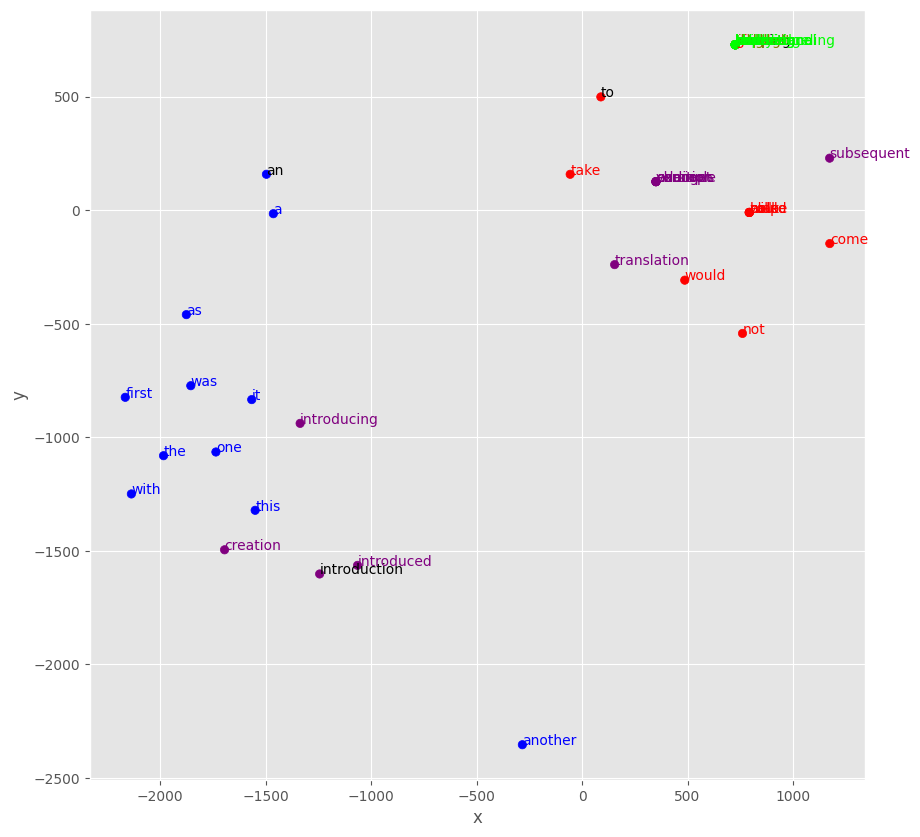

In [ ]:
word_list = ['an', 'introduction', 'to', 'deep', 'learning']
plot2D_with_groups(word_list=word_list, k=10, model=word2vect)

## <span style="color:#0b486b">Part 2: Text CNN for sequence modeling and neural embedding </span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 10 marks]<span></div>

#### <span style="color:red">**Question 2.1**</span>

**In what follows, you are required to complete the code for Text CNN for sentence classification. The paper of Text CNN can be found at this [link](https://www.aclweb.org/anthology/D14-1181.pdf). Here is the description of the Text CNN that you need to construct.**
- There are three attributes (properties or instance variables): *embed_size, state_size, data_manager*.
  - `embed_size`: the dimension of the vector space for which the words are embedded to using the embedding matrix.
  - `state_size`: the number of filters used in *Conv1D* (reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)).
  - `data_manager`: the data manager to store information of the dataset.
- The detail of the computational process is as follows:
  - Given input $x$, we embed $x$ using the embedding matrix to obtain an $3D$ tensor $[batch\_size \times maxlen \times embed\_size]$ as $h$.
  - We feed $h$ to three *Conv1D* layers, each of which has $state\_size$ filters, padding=same, activation= relu, and $kernel\_size= 3, 5, 7$ respectively to obtain $h1, h2, h3$. Note that each $h1, h2, h3$ is a 3D tensor with the shape $[batch\_size \times output\_size \times state\_size]$.
  - We then apply *GlobalMaxPool1D()* (reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D)) over $h1, h2, h3$ to obtain 2D tensors stored in $h1, h2, h3$ again.
  - We then concatenate three 2D tensors $h1, h2, h3$ to obtain $h$. Note that you need to specify the axis to concatenate.
  - We finally build up one dense layer on the top of $h$ for classification.
  
  <div style="text-align: right"><span style="color:red">[8 marks]</span></div>
  

In [6]:
class TextCNN:
    def __init__(self, embed_size= 128, state_size=16, data_manager=None):
        self.data_manager = data_manager
        self.embed_size = embed_size
        self.state_size = state_size

    def build(self):
        x = tf.keras.layers.Input(shape=[None])
        h = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True)(x)
        h1 = tf.keras.layers.Conv1D(self.state_size, padding="same", activation="relu", kernel_size=3)(h)
        h2 = tf.keras.layers.Conv1D(self.state_size, padding="same", activation="relu", kernel_size=5)(h)
        h3 = tf.keras.layers.Conv1D(self.state_size, padding="same", activation="relu", kernel_size=7)(h)
        h1 = tf.keras.layers.GlobalMaxPooling1D()(h1)
        h2 = tf.keras.layers.GlobalMaxPooling1D()(h2)
        h3 = tf.keras.layers.GlobalMaxPooling1D()(h3)
        h = tf.keras.layers.Concatenate()([h1, h2, h3])
        h = tf.keras.layers.Dense(self.data_manager.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)
        return self.model

    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)


#### <span style="color:red">**Question 2.2**</span>
**Here is the code to test TextCNN above. You can observe that TextCNN outperforms the traditional approach Word2Vect with Logistic Regression for this task. The reason is that TextCNN enables us to automatically learn the feature that fits to the task. This makes deep learning different from hand-crafted feature approaches. Complete the code to test the model. Note that when compiling the model, you can use the Adam optimizer.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
text_cnn = TextCNN(data_manager=dm)
text_cnn.build()
# Insert your code here
# You are required to compile the model and train the model on 20 epochs

text_cnn.compile_model(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
text_cnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 7s 150ms/step - loss: 1.6347 - accuracy: 0.3963 - val_loss: 1.4836 - val_accuracy: 0.4525
Epoch 2/20
25/25 [==============================] - 4s 171ms/step - loss: 1.2574 - accuracy: 0.7194 - val_loss: 1.0497 - val_accuracy: 0.8375
Epoch 3/20
25/25 [==============================] - 3s 121ms/step - loss: 0.7291 - accuracy: 0.8975 - val_loss: 0.5204 - val_accuracy: 0.9175
Epoch 4/20
25/25 [==============================] - 3s 130ms/step - loss: 0.3223 - accuracy: 0.9488 - val_loss: 0.2606 - val_accuracy: 0.9550
Epoch 5/20
25/25 [==============================] - 5s 192ms/step - loss: 0.1606 - accuracy: 0.9663 - val_loss: 0.1742 - val_accuracy: 0.9550
Epoch 6/20
25/25 [==============================] - 2s 77ms/step - loss: 0.0925 - accuracy: 0.9875 - val_loss: 0.1350 - val_accuracy: 0.9650
Epoch 7/20
25/25 [==============================] - 2s 78ms/step - loss: 0.0576 - accuracy: 0.9944 - val_loss: 0.1136 - val_accuracy: 0.9675
Epoch 8/

## <span style="color:#0b486b">Part 3: RNN-based models for sequence modeling and neural embedding</span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 32 marks]<span></div>

### <span style="color:#0b486b">3.1. RNNs with different cell types</span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 12 marks]<span></div>

#### <span style="color:red">**Question 3.1.1**</span>
**In this part, you need to construct a vanilla RNN to learn from the dataset of interest. Basically, you are required to construct the class RNN with the following requirements:**
- Attribute `data_manager (self.data_manager)`: specifies the data manager used to store data for the model.
- Attribute `cell_type (self.cell_type)`: can take one of the three values, i.e., `simple_rnn`, `gru`, or `lstm` which specifies the memory cells formed a hidden layer.
- `state_sizes (self.state_sizes)` indicates the list of the hidden sizes  of memory cells. For example, $state\_sizes = [64, 128]$ means that you have two hidden layers in your network with hidden sizes of $64$ and $128$ respectively.

**Note that when declaring an embedding layer for the network, you need to set *mask_zero=True* so that the padding zeros in the sentences will be masked and ignored. This helps to have variable length RNNs. For more detail, you can refer to this [link](https://www.tensorflow.org/guide/keras/masking_and_padding).**

<div style="text-align: right"><span style="color:red">[7 marks]</span></div>

In [7]:
class BaseRNN:
    def __init__(self, cell_type='gru', embed_size=128, state_sizes=[128, 64], data_manager=None):
        self.cell_type = cell_type
        self.state_sizes = state_sizes
        self.embed_size = embed_size
        self.data_manager = data_manager
        self.vocab_size = self.data_manager.vocab_size + 1

    # return the corresponding memory cell
    @staticmethod
    def get_layer(cell_type='gru', state_size=128, return_sequences=False, activation='tanh'):
        if cell_type == 'gru':
            return tf.keras.layers.GRU(state_size, return_sequences=return_sequences, activation=activation)
        elif cell_type == 'lstm':
            return tf.keras.layers.LSTM(state_size, return_sequences=return_sequences, activation=activation)
        else:
            return tf.keras.layers.SimpleRNN(state_size, return_sequences=return_sequences, activation=activation)

    def build(self):
        x = tf.keras.layers.Input(shape=[None])
        h = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True)(x)
        num_layers = len(self.state_sizes)
        for i in range(num_layers):
            return_sequences = i != num_layers-1  # i.e. not the last rnn layer
            h = BaseRNN.get_layer(cell_type=self.cell_type, state_size=self.state_sizes[i], return_sequences=return_sequences)(h)
        h = tf.keras.layers.Dense(dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)

    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)


#### <span style="color:red">**Question 3.1.2**</span>
**Run with simple RNN ('simple_rnn') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 mark]</span></div>

In [ ]:
base_rnn = BaseRNN(cell_type="simple_rnn", embed_size=128, state_sizes=[64, 128], data_manager=dm)
base_rnn.build()
base_rnn.model.summary()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 128)         573056    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, None, 64)          12352     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
Total params: 610886 (2.33 MB)
Trainable params: 610886 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
25/25 [=====

#### <span style="color:red">**Question 3.1.3**</span>
**Run with GRU ('gru') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 mark]</span></div>

In [ ]:
base_rnn = BaseRNN(cell_type="gru", embed_size=128, state_sizes=[64, 128], data_manager=dm)
base_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 20s 461ms/step - loss: 1.6735 - accuracy: 0.2512 - val_loss: 1.5905 - val_accuracy: 0.3525
Epoch 2/20
25/25 [==============================] - 11s 446ms/step - loss: 1.2281 - accuracy: 0.4844 - val_loss: 0.6950 - val_accuracy: 0.7300
Epoch 3/20
25/25 [==============================] - 10s 389ms/step - loss: 0.4026 - accuracy: 0.8506 - val_loss: 0.3020 - val_accuracy: 0.9050
Epoch 4/20
25/25 [==============================] - 8s 319ms/step - loss: 0.1518 - accuracy: 0.9600 - val_loss: 0.1968 - val_accuracy: 0.9425
Epoch 5/20
25/25 [==============================] - 9s 334ms/step - loss: 0.0864 - accuracy: 0.9781 - val_loss: 0.1625 - val_accuracy: 0.9550
Epoch 6/20
25/25 [==============================] - 10s 421ms/step - loss: 0.0287 - accuracy: 0.9931 - val_loss: 0.1824 - val_accuracy: 0.9525
Epoch 7/20
25/25 [==============================] - 10s 385ms/step - loss: 0.0378 - accuracy: 0.9869 - val_loss: 0.1738 - val_accuracy: 0.9575
E

#### <span style="color:red">**Question 3.1.4**</span>
**Run with LSTM ('lstm') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 mark]</span></div>

In [ ]:
base_rnn = BaseRNN(cell_type="lstm", embed_size=128, state_sizes=[64, 128], data_manager=dm)
base_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 23s 596ms/step - loss: 1.6676 - accuracy: 0.2900 - val_loss: 1.4171 - val_accuracy: 0.4825
Epoch 2/20
25/25 [==============================] - 10s 406ms/step - loss: 0.8815 - accuracy: 0.7081 - val_loss: 0.4096 - val_accuracy: 0.9175
Epoch 3/20
25/25 [==============================] - 11s 459ms/step - loss: 0.2795 - accuracy: 0.9269 - val_loss: 0.2356 - val_accuracy: 0.9175
Epoch 4/20
25/25 [==============================] - 11s 431ms/step - loss: 0.1331 - accuracy: 0.9588 - val_loss: 0.1870 - val_accuracy: 0.9150
Epoch 5/20
25/25 [==============================] - 10s 404ms/step - loss: 0.0780 - accuracy: 0.9812 - val_loss: 0.1045 - val_accuracy: 0.9650
Epoch 6/20
25/25 [==============================] - 10s 390ms/step - loss: 0.0378 - accuracy: 0.9906 - val_loss: 0.1055 - val_accuracy: 0.9650
Epoch 7/20
25/25 [==============================] - 13s 519ms/step - loss: 0.0507 - accuracy: 0.9881 - val_loss: 0.0845 - val_accuracy: 0.9725

#### <span style="color:red">**Question 3.1.5**</span>
**Write code to conduct experiments to compare the accuracies of RNNs with the three different cell types using 2 different lists of `state_sizes` (while the other hyperparameters are fixed). Specifically, for each `state_sizes = [...]`, you should report the accuracies of RNNs with simple RNN ('simple_rnn') cell, GRU ('gru') cell, and LSTM ('lstm') cell. Give your comments on the results.**
<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
# Insert your code here
state_sizes_options = [[64, 128], [128, 64]]
cell_type_options = ["simple_rnn", "gru", "lstm"]
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

hists = []
i = 0

for cell_type in cell_type_options:
    for state_sizes in state_sizes_options:
        print(f"============================Model {i+1} / 6==========================")
        base_rnn = BaseRNN(cell_type=cell_type, embed_size=128, state_sizes=state_sizes, data_manager=dm)
        base_rnn.build()
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
        base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        hist = base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])
        hists.append(hist)
        i += 1

============================Model 1 / 6==========================
Epoch 1/20
25/25 [==============================] - 8s 227ms/step - loss: 0.8544 - accuracy: 0.7031 - val_loss: 0.2839 - val_accuracy: 0.9125
Epoch 2/20
25/25 [==============================] - 3s 116ms/step - loss: 0.1688 - accuracy: 0.9513 - val_loss: 0.1368 - val_accuracy: 0.9575
Epoch 3/20
25/25 [==============================] - 4s 161ms/step - loss: 0.0848 - accuracy: 0.9731 - val_loss: 0.1578 - val_accuracy: 0.9425
Epoch 4/20
25/25 [==============================] - 3s 115ms/step - loss: 0.0490 - accuracy: 0.9869 - val_loss: 0.1603 - val_accuracy: 0.9450
Epoch 5/20
25/25 [==============================] - 3s 109ms/step - loss: 0.0470 - accuracy: 0.9837 - val_loss: 0.0972 - val_accuracy: 0.9725
Epoch 6/20
25/25 [==============================] - 3s 110ms/step - loss: 0.0107 - accuracy: 0.9975 - val_loss: 0.0957 - val_accuracy: 0.9650
Epoch 7/20
25/25 [==============================] - 3s 109ms/step - loss: 0.0239 -

In [ ]:
import itertools

In [ ]:
def plot_accuracy(options: list[str], hists):
  """options must be a list of options"""
  for i in range(len(options)):
    option = options[i]
    acc_hist = hists[i].history["val_accuracy"]
    plt.plot(acc_hist, label=option)

  plt.legend()

def compare_last_acc(options, hists):
    accs = [max(hist.history["val_accuracy"]) for hist in hists]
    plt.scatter(options, accs)
    plt.xticks(rotation=90)

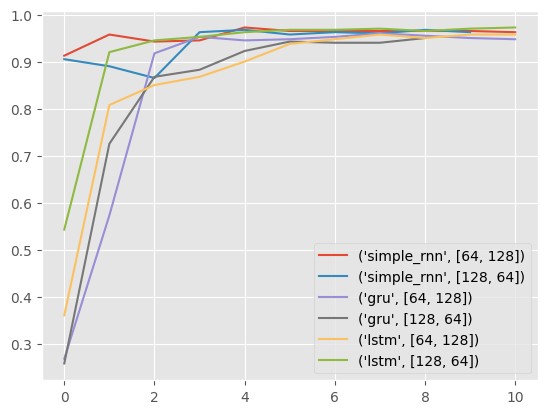

In [ ]:
plot_accuracy([str(x) for x in list(itertools.product(cell_type_options, state_sizes_options))], hists)

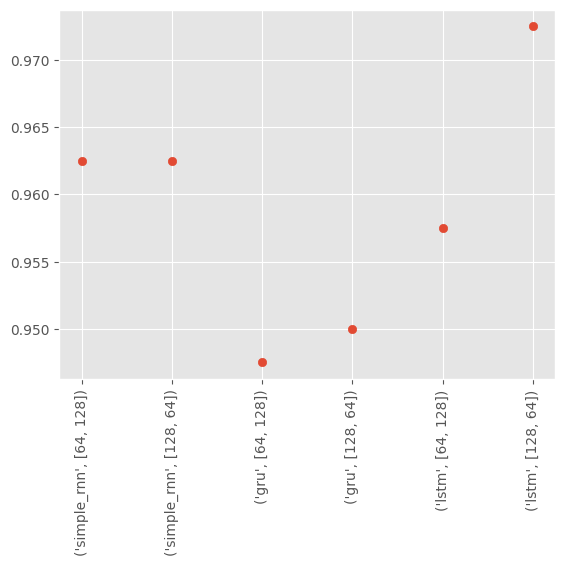

In [ ]:
compare_last_acc([str(x) for x in list(itertools.product(cell_type_options, state_sizes_options))], hists)

\# Give your comments on the results here (maximum 150 words)

It seems that LSTM with hidden states of [128, 64] has the highest validation accuracy. This makes sense because LSTM has a cell dedicated to long-term memory, unlike SimpleRNN. The fact that the state sizes of [128, 64] is better than [64, 128] overall makes sense as well because a smaller hidden nodes at earlier layers become a bottleneck and only a limited amount of information can be propagated afterwards.

### <span style="color:#0b486b">3.2. RNNs with fine-tuning embedding matrix</span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 8 marks]<span></div>

#### <span style="color:red">**Question 3.2.1**</span>

**In what follows, you are required to extend the class BaseRNN in Part 3.1 to achieve a class RNN in which the embedding matrix can be initialized using a pretrained Word2Vect.**

**Below are the descriptions of the attributes of the class *RNN*:**
- `run_mode (self.run_mode)` has three values (scratch, init-only, and init-fine-tune).
  - `scratch` means training the embedding matrix from scratch.
  - `init-only` means only initializing the embedding matrix with a pretrained Word2Vect but **not further doing** fine-tuning that matrix.
  - `init-fine-tune` means both initializing the embedding matrix with a pretrained Word2Vect and **further doing** fine-tuning that matrix.
- `cell_type (self.cell_type)` has three values (simple-rnn, gru, and lstm) which specify the memory cell used in the network.
- `embed_model (self.embed_model)` specifes the pretrained Word2Vect model used.
-  `embed_size (self.embed_size)` specifes the embedding size. Note that when run_mode is either 'init-only' or 'init-fine-tune', this embedding size is extracted from embed_model for dimension compatability.
- `state_sizes (self.state_sizes)` indicates the list of the hidden sizes  of memory cells. For example, $state\_sizes = [64, 128]$ means that you have two hidden layers in your network with hidden sizes of $64$ and $128$ respectively.

**Complete the code of the class *RNN*.**

<div style="text-align: right"><span style="color:red">[6 marks]</span></div>

In [8]:
class RNN(BaseRNN):
    def __init__(self, run_mode='scratch', embed_model='glove-wiki-gigaword-100', **kwargs):
        super().__init__(**kwargs)
        self.run_mode = run_mode
        self.embed_model = embed_model
        if self.run_mode != 'scratch':
            self.embed_size = int(self.embed_model.split("-")[-1])
        self.word2idx = dm.word2idx
        self.word2vect = None
        self.embed_matrix = np.zeros(shape=[self.vocab_size, self.embed_size])

    def build_embedding_matrix(self):
        # get model
        try:
          model = word2vect
        except:
          model = api.load(self.embed_model)

        for idx, word in self.data_manager.idx2word.items():
            try:
                word_embedding = model.get_vector(word)
            except:
                continue
            self.embed_matrix[idx, :] = word_embedding


    def build(self):
        # Insert your code here to override the 'build' method of BaseRNN
        if self.run_mode == "init-fine-tune":
            self.build_embedding_matrix()
            embedding_layer = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True, weights=[self.embed_matrix])
        elif self.run_mode == "init-only":
            self.build_embedding_matrix()
            embedding_layer = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True, weights=[self.embed_matrix], trainable=False)

        else:
            embedding_layer = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True)

        x = tf.keras.layers.Input(shape=[None])
        h = embedding_layer(x)
        num_layers = len(self.state_sizes)
        for i in range(num_layers):
            return_sequences = i != num_layers-1  # i.e. not the last rnn layer
            h = BaseRNN.get_layer(cell_type=self.cell_type, state_size=self.state_sizes[i], return_sequences=return_sequences)(h)
        h = tf.keras.layers.Dense(self.data_manager.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)


    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)

#### <span style="color:red">**Question 3.2.2**</span>

**Write code to conduct experiments to compare three running modes for the embedding matrix. Note that you should stick with fixed values for other attributes and only vary *run_mode*. Give your comments on the results.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
run_mode_options = ["scratch", "init-only", "init-fine-tune"]
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

hists = []

for run_mode in run_mode_options:

    rnn = RNN(run_mode=run_mode, cell_type="lstm", embed_size=128, state_sizes=[128, 64], data_manager=dm)
    rnn.build()
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    hist = rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])
    hists.append(hist)

Epoch 1/20
25/25 [==============================] - 26s 657ms/step - loss: 1.6772 - accuracy: 0.2956 - val_loss: 1.4886 - val_accuracy: 0.4475
Epoch 2/20
25/25 [==============================] - 15s 616ms/step - loss: 1.0297 - accuracy: 0.6375 - val_loss: 0.6659 - val_accuracy: 0.7850
Epoch 3/20
25/25 [==============================] - 13s 543ms/step - loss: 0.4738 - accuracy: 0.8662 - val_loss: 0.3535 - val_accuracy: 0.9100
Epoch 4/20
25/25 [==============================] - 17s 698ms/step - loss: 0.2135 - accuracy: 0.9494 - val_loss: 0.2118 - val_accuracy: 0.9475
Epoch 5/20
25/25 [==============================] - 15s 605ms/step - loss: 0.1389 - accuracy: 0.9650 - val_loss: 0.1838 - val_accuracy: 0.9375
Epoch 6/20
25/25 [==============================] - 16s 669ms/step - loss: 0.1026 - accuracy: 0.9787 - val_loss: 0.1612 - val_accuracy: 0.9375
Epoch 7/20
25/25 [==============================] - 14s 552ms/step - loss: 0.0724 - accuracy: 0.9825 - val_loss: 0.1267 - val_accuracy: 0.9650

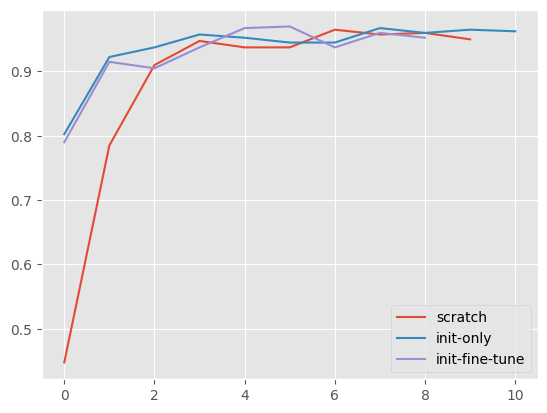

In [ ]:
plot_accuracy(run_mode_options, hists)

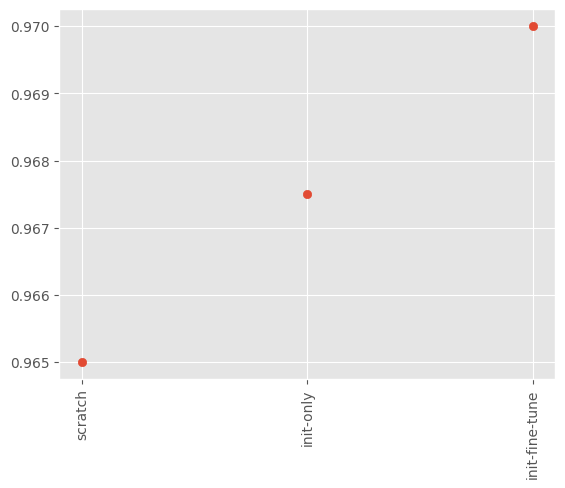

In [ ]:
compare_last_acc(run_mode_options, hists)

\# Give your comments on the results here (maximum 150 words)

We see that the model created with init-fine-tune model has the highest accuracy of 0.970. Interestingly, the init-only-mode model has the higher accuracy than the scatch-mode model. We also see that both initi-only mode and init-fine-tune mode lead to a high accuracy from the first epoch and faster convergence, indicating that using the pre-trained embeddings is useful.

### <span style="color:#0b486b">3.3. RNNs with Attention for Text and Sequence Classification</span> ###

**In what follows, you are required to implement a RNN with the attention mechanism for text and sequence classification. This attention mechanism is applied at the last hidden layer of our RNN. Specifically, let $\textbf{h}_1^L, \textbf{h}_2^L,...,\textbf{h}_{T-1}^L, \textbf{h}_T^L$ be the hidden states at the last hidden layer $L$ where $T$ is the sequence length. We compute the context vector $\textbf{c}$ as $\textbf{c}=\sum_{i=1}^{T}\textbf{a}_{i}\textbf{h}_{i}^L$ where $\textbf{a}_1,...,\textbf{a}_T$ are the alignment weights (i.e., $\textbf{a}_i\geq 0$ and $\sum_{i=1}^{T}\textbf{a}_{i}=1$).**

**The alignment weights are computed as follows:**
- $\textbf{a}=[\textbf{a}_{i}]_{i=1}^{T}=\text{softmax}(\textbf{s})$ where $\textbf{s}= [\textbf{s}_{i}]_{i=1}^{T}$ consists of the alignment scores.
- The alignment scores are computed as $\textbf{s}=\text{tanh}(\textbf{h}^LU)V$ where $\textbf{h}^L=\left[\begin{array}{c}
\textbf{h}_{1}^L\\
\textbf{h}_{2}^L\\
...\\
\textbf{h}_{T-1}^L\\
\textbf{h}_{T}^L
\end{array}\right]\in\mathbb{R}^{T\times state\_size_{L}}$, $U\in\mathbb{R}^{state\_size_{L}\times output\_length}$, $V\in\mathbb{R}^{output\_length\times1}$, and $output\_length$ is a hyperparameter. Note that if we consider a mini-batch, the shape of $\textbf{h}^L$ is $(batch\_size, T, state\_size_L)$ where $state\_size_L$ is the hidden size of the last hidden layer. The figure on the right below illustrates the process of calculating a score $\textbf{s}_i$ for an individual hidden state $\textbf{h}_i^L$. Weight matrices $U$ and $V$ are shared across the hidden states $\textbf{h}_1^L,\textbf{h}_2^L,\dots,\textbf{h}_T^L$.

**After having the context vector $\textbf{c}$, we concatenate with the last hidden state $\textbf{h}_T^L$. On top of this concatenation, we conduct the output layer with the softmax activation.**

<img src="./images/attentionRNN.png" align="center" width=700/>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 12 marks]<span></div>

#### <span style="color:red">**Question 3.3.1**</span>

**We declare the  layer `MyAttention` as a class inherited from `tf.keras.layers.Layer` to realize our attention mechanism. You are required to provide the code for this class. Note that in the `def call(self, all_states, last_state)` method, `all_states` is the collection of all hidden states and `last_state` is the last hidden state.**

<div style="text-align: right"><span style="color:red">[4 marks]</span></div>

In [9]:
@tf.keras.saving.register_keras_serializable()
class MyAttention(tf.keras.layers.Layer):
    def __init__(self, output_length=50):
        super().__init__()
        self.output_length = output_length
        self.first_dense = tf.keras.layers.Dense(output_length, activation="softmax")  # has U as its parameter
        self.second_dense = tf.keras.layers.Dense(1, activation="softmax")  # has V as its parameter


    # all_states is the collection of all hidden states and last_state is the last hidden state
    def call(self, all_states, last_state):
        # all_states.shape = (batch, seq, hidden_size)
        # last_state.shape = (batch, hidden_size)
        latent = self.first_dense(all_states)  # position-wise dense; output shape = (batch, seq, self.output_length)
        a = self.second_dense(latent)  # shape = (batch, seq, 1)
        a = tf.squeeze(a, axis=-1) # (batch_dim, seq_dim)

        # c = tf.linalg.matmul(a, all_states) # (batch, hidden_size)

        a = tf.expand_dims(a, axis=-1)  # for broadcasting (batch, hidden_size, new_axis)
        # c = tf.matmul(a, all_states)
        pre_c = tf.multiply(a, all_states)  # (batch, seq_size, hidden_size)
        c = tf.reduce_sum(pre_c, axis=1)  # (batch, hidden_size)

        oup = tf.concat([c, last_state], 1) # (batch, hidden_size*2)

        return oup

#### <span style="color:red">**Question 3.3.2**</span>

**You are required to extend the class `RNN` in Question `3.2.1` to achieve the class `AttentionRNN` in which the attention mechanism mentioned above is applied at the last hidden layer.**

<div style="text-align: right"><span style="color:red">[6 marks]</span></div>

In [10]:
class AttentionRNN(RNN):
    def __init__(self, output_length=50, **kwargs):
        super().__init__(**kwargs)
        self.output_length = output_length

    @staticmethod
    def get_layer(cell_type='gru', state_size=128, return_sequences=False, activation='tanh'):
        # Insert your code here to override the method get_layer() in BaseRNN class.
        if cell_type == 'gru':
            return tf.keras.layers.GRU(state_size, return_sequences=return_sequences, activation=activation)
        elif cell_type == 'lstm':
            return tf.keras.layers.LSTM(state_size, return_sequences=return_sequences, activation=activation)
        else:
            return tf.keras.layers.SimpleRNN(state_size, return_sequences=return_sequences, activation=activation)

    def build(self):
        # Insert your code here to override the 'build' method of BaseRNN
        if self.run_mode == "init-fine-tune":
            embedding_layer = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True, weights=[self.embed_matrix])
        elif self.run_mode == "init-only":
            embedding_layer = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True, weights=[self.embed_matrix], trainable=False)

        else:
            embedding_layer = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True)

        x = tf.keras.layers.Input(shape=[None])
        h = embedding_layer(x)
        num_layers = len(self.state_sizes)
        for i in range(num_layers):
            h = BaseRNN.get_layer(cell_type=self.cell_type, state_size=self.state_sizes[i], return_sequences=True)(h)
        h = MyAttention(output_length=self.output_length)(h, h[:, -1])
        h = tf.keras.layers.Dense(self.data_manager.num_classes, activation="softmax")(h)
#         h = tf.keras.layers.Dense(self.dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)

        return self.model

    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)

#### <span style="color:red">**Question 3.3.3**</span>

**Choose a common setting for standard RNN and RNN with attention and conduct experiments to compare them. The setting here means `run_mode`, `cell_type` and list of `state_sizes`. Give your comments on the results.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
cell_type = "lstm"
run_mode = "scratch"
state_sizes = [128, 64]
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
output_legnth = 50


# LSTM with attention
attention_rnn = AttentionRNN(run_mode=run_mode, cell_type=cell_type, embed_size=128, state_sizes=state_sizes, data_manager=dm, output_length=50)
attention_rnn.build()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
attention_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
attention_rnn_hist = attention_rnn.fit(dm.tf_train_set.batch(64), epochs=30, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])


# standard LSTM
rnn = RNN(run_mode=run_mode, cell_type=cell_type, embed_size=128, state_sizes=state_sizes, data_manager=dm)
rnn.build()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
standard_rnn_hist = rnn.fit(dm.tf_train_set.batch(64), epochs=30, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])

Epoch 1/30
25/25 [==============================] - 15s 194ms/step - loss: 1.3411 - accuracy: 0.5625 - val_loss: 0.5920 - val_accuracy: 0.8950
Epoch 2/30
25/25 [==============================] - 1s 23ms/step - loss: 0.2616 - accuracy: 0.9444 - val_loss: 0.2153 - val_accuracy: 0.9250
Epoch 3/30
25/25 [==============================] - 1s 31ms/step - loss: 0.0790 - accuracy: 0.9800 - val_loss: 0.1365 - val_accuracy: 0.9600
Epoch 4/30
25/25 [==============================] - 1s 33ms/step - loss: 0.0511 - accuracy: 0.9869 - val_loss: 0.1613 - val_accuracy: 0.9625
Epoch 5/30
25/25 [==============================] - 1s 24ms/step - loss: 0.0211 - accuracy: 0.9975 - val_loss: 0.1443 - val_accuracy: 0.9675
Epoch 6/30
25/25 [==============================] - 0s 18ms/step - loss: 0.0126 - accuracy: 0.9975 - val_loss: 0.1949 - val_accuracy: 0.9575
Epoch 1/30
25/25 [==============================] - 14s 229ms/step - loss: 1.6113 - accuracy: 0.4069 - val_loss: 1.2089 - val_accuracy: 0.6275
Epoch 2/3

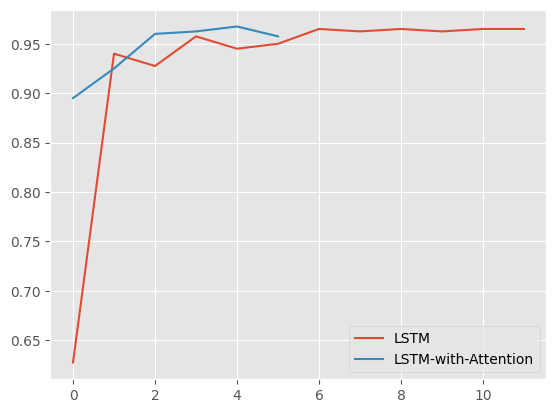

In [ ]:
hists = [
    standard_rnn_hist,
    attention_rnn_hist
]
plot_accuracy(["LSTM", "LSTM-with-Attention"], hists)

\# Give your comments on the results here (maximum 150 words) <br>
We see that LSTM with attention has higher accuracy compared to the standard LSTM overall. We also see that LSTM-with-Attention model predicts very with high accuracy (about 0.92) from the first epoch. Therefore, we can argue that is can learn better per epoch.

## <span style="color:#0b486b">Part 4: Transformer-based models for sequence modeling and neural embedding and the overall ranking</span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 23 marks]<span></div>

#### <span style="color:red">**Question 4.1**</span>

**Implement the multi-head attention module of the Transformer for the text classification problem. The provided code is from [this source](https://keras.io/examples/nlp/text_classification_with_transformer/). In this part, we only use the output of the Transformer encoder for the classification task. For further information on the Transformer model, refer to [this paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf).**

<div style="text-align: right"><span style="color:red">[11 marks]</span></div>

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
@keras.saving.register_keras_serializable()
class MultiHeadAttention(layers.Layer):
    def __init__(self, num_heads, embed_dim):
        super(MultiHeadAttention, self).__init__()
        self.weight_queries = [layers.Dense(embed_dim, use_bias=False) for _ in range(num_heads)]
        self.weight_keys = [layers.Dense(embed_dim, use_bias=False) for _ in range(num_heads)]
        self.weight_values = [layers.Dense(embed_dim, use_bias=False) for _ in range(num_heads)]

        self.num_heads = num_heads
        self.embed_dim = embed_dim

        self.weight_oup = layers.Dense(embed_dim)

    def call(self, inputs):
        # input.shape = (batch_dim, sequence_dim, embedding_dim)

        # creating Q, K, V for all heads
        Q = tf.stack([W_q(inputs) for W_q in self.weight_queries])
        K_transposed = tf.stack([tf.transpose(W_k(inputs), perm=[0,2,1]) for W_k in self.weight_keys])
        V = tf.stack([W_v(inputs) for W_v in self.weight_values])

        # calculate attention
        # (head_dim, batch_dim, sequence_dim, embedding_dim)
        A_unaligned = tf.linalg.matmul(Q, K_transposed) / tf.math.sqrt(tf.cast(self.embed_dim, dtype=tf.float32))

        # (head_dim, batch_dim, query_dim, key_dim)
        A = tf.keras.activations.softmax(A_unaligned, axis=-1)
        output = tf.linalg.matmul(A, V)  # for each instance, attention for a paricular key vector is broadcated

        # (head_dim, batch_dim, seq_dim, embedding_dim)
        output_transposed = tf.transpose(output, perm=[1, 2, 3, 0])
        _, seq_dim, embedding_dim, head_dim = output_transposed.shape  # note we shouldn't the output fro batch_dim since it's None and you cannot put None into the reshape function
        batch_dim = tf.shape(output_transposed)[0]
        concatenated_output = tf.reshape(output_transposed, shape=(batch_dim, seq_dim, embedding_dim*head_dim))
        # shape = (batch_dim, seq_dim, embed_dim), where embed dim dimensionality = embedding_size*num_heads

        final_output = self.weight_oup(concatenated_output)
        # shape = (batch_dim, seq_dim, embed_dim) with embed being dimensionality = embedding_size
        return final_output

In [13]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention(num_heads, embed_dim)
        self.ffn = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [14]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [15]:
from tensorflow.keras.layers import Input, GlobalAveragePooling1D, Dropout, Dense
from tensorflow.keras.models import Sequential

vocab_size = dm.vocab_size + 1
maxlen = dm.maxlen

def create_tfm_model(embed_dim=64, num_heads=8, ff_dim=32, dropout_rate=0.1):
    """
    Creates a Transformer model using the given hyperparameters.

    Parameters:
        embed_dim (int): The embedding dimension for each token.
        num_heads (int): The number of attention heads in the multi-head attention layer.
        ff_dim (int): The hidden layer size in the feed forward network inside the transformer block.
        dropout_rate (float): The dropout rate for regularization.
    Returns:
        keras.models.Sequential: A Transformer model.
    """
    tfm = Sequential()
    tfm.add(Input(shape=(maxlen,)))
    tfm.add(TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim))
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)
    tfm.add(transformer_block)
    tfm.add(GlobalAveragePooling1D())
    tfm.add(Dropout(dropout_rate))
    tfm.add(Dense(units=dm.num_classes, activation='softmax'))
    tfm.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return tfm

In [ ]:
model = create_tfm_model()
model.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 6s 179ms/step - loss: 1.7993 - accuracy: 0.2094 - val_loss: 1.6382 - val_accuracy: 0.2125
Epoch 2/20
25/25 [==============================] - 7s 271ms/step - loss: 1.6557 - accuracy: 0.2675 - val_loss: 1.5655 - val_accuracy: 0.3825
Epoch 3/20
25/25 [==============================] - 9s 372ms/step - loss: 1.4117 - accuracy: 0.4538 - val_loss: 1.2276 - val_accuracy: 0.6375
Epoch 4/20
25/25 [==============================] - 8s 304ms/step - loss: 0.6320 - accuracy: 0.8163 - val_loss: 0.4336 - val_accuracy: 0.8975
Epoch 5/20
25/25 [==============================] - 10s 391ms/step - loss: 0.1718 - accuracy: 0.9625 - val_loss: 0.3096 - val_accuracy: 0.9100
Epoch 6/20
25/25 [==============================] - 9s 381ms/step - loss: 0.0535 - accuracy: 0.9937 - val_loss: 0.1588 - val_accuracy: 0.9500
Epoch 7/20
25/25 [==============================] - 10s 424ms/step - loss: 0.0266 - accuracy: 0.9962 - val_loss: 0.1488 - val_accuracy: 0.9450
Epoc

#### <span style="color:red">**Question 4.2**</span>
**Write code to conduct experiments to evaluate the impact of hyperparameters `embed_dim`, `num_heads`, `ff_dim`, and `dropout_rate` of the Transformer model on the accuracy. Report (i) your findings from the experiments, (ii) the accuracy of your best Transformer model (i.e., the one with the highest accuracy on the validation set), and (iii) the values of the mentioned hyperparameters of that best model.  
Note that the necessary condition to get the full mark for this question is that the accuracy of your best Transformer model should be at least 90%.**
<div style="text-align: right"><span style="color:red">[3 marks]</span></div>

I did the optimization of the transformer-based model in the next question, so please see the next question.

#### <span style="color:red">**Question 4.3**</span>
**For any models defined in the previous questions (of all parts), you are free to fine-tune hyperparameters, e.g., `optimizer`, `learning_rate`, `state_sizes`, such that you get a best model, i.e., the one with the highest accuracy on the validation set. You will need to report (i) what is your best model,  (ii) its accuracy on the validation set, and (iii) the values of its hyperparameters. Note that you must report your best model's accuracy with rounding to 4 decimal places, i.e., 0.xxxx. You will also need to upload your best model (or provide us with the link to download your best model). The assessment will be based on your best model's accuracy, with up to 9 marks available, specifically:**
* The best accuracy $\ge$ 0.98: 9 marks
* 0.98 $>$ The best accuracy $\ge$ 0.92: 6 marks
* 0.92 $>$ The best accuracy $\ge$ 0.85: 3 marks
* The best accuracy $<$ 0.85: 0 mark
<div style="text-align: right"><span style="color:red">[9 marks]</span></div>

To make the hyper-parameter optimization process quicker, I use Bayesean optimization implemented in keras-tuner.

In [16]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.9 MB/s eta 0:00:00


In [17]:
import keras_tuner

Using TensorFlow backend


Since we already know that the TextCNN, LSTM-wth-Attention, and Transformer models outperforms other models, we will specifically optimize these only. For the TextCNN model, we change state_size (number of filters) and embed_size. For the LSTM-with-Attention model, we change state_sizes, output_length, and embed_size. For the trasformer model, we change embed_dim, num_heads, ff_dim, and dropout_rate.

In [15]:
def lstm_with_attention_builder_wrapper(hp):
    cell_type = "lstm"
    run_mode = "init-fine-tune"
    state_size1 = hp.Choice("state_size1", [64, 128, 224, 288])
    state_size2 = hp.Choice("state_size2", [24, 32, 64, 128])
    state_sizes = [state_size1, state_size2]
    output_length = hp.Int("output_length", min_value=50, max_value=170, step=40)
    embed_size = hp.Int("embed_dim", min_value=64, max_value=256, step=32)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model_wrapper = AttentionRNN(run_mode=run_mode, cell_type=cell_type, embed_size=embed_size, state_sizes=state_sizes, data_manager=dm, output_length=output_length)
    model = model_wrapper.build()
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model



def transformer_builder_wrapper(hp):
    embed_dim = hp.Int("embed_dim", min_value=64, max_value=256, step=32)
    num_heads = hp.Int("num_heads", min_value=8, max_value=24, step=8)
    ff_dim = hp.Int("ff_dim", min_value=32, max_value=160, step=20)
    dropout_rate = hp.Choice("dropout_rate", [0.01, 0.02, 0.05, 0.1, 0.2, 0.3])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model = create_tfm_model(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, dropout_rate=dropout_rate)
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model


def textCNN_builder_wrapper(hp):

    embed_size = hp.Int("embed_size", min_value=64, max_value=256, step=32)
    state_size = hp.Int("state_size", min_value=8, max_value=256, step=32)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    text_cnn_wrapper = TextCNN(data_manager=dm, embed_size= embed_size, state_size=state_size)
    text_cnn = text_cnn_wrapper.build()

    text_cnn.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return text_cnn

We first optimize LSTM-wth-Attention model.

In [ ]:
lstm_with_attention_tuner = keras_tuner.RandomSearch(
    hypermodel=lstm_with_attention_builder_wrapper,
    objective="val_accuracy",
    max_trials=100,
    overwrite=True,
    directory="trained_models",
    project_name="lstm_with_attention_tuner",
)

We see that the the best validation accuracy for the model is 0.977500.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lstm_with_attention_tuner.search(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])

Trial 100 Complete [00h 00m 20s]
val_accuracy: 0.9725000262260437

Best val_accuracy So Far: 0.9775000214576721
Total elapsed time: 00h 37m 41s


The best hyperparameters are as follow:

In [ ]:
lstm_with_attention_tuner.get_best_hyperparameters()[0].values

{'state_size1': 288, 'state_size2': 128, 'output_length': 130, 'embed_dim': 64}

Now we tune the transformer model.

In [27]:
transformer_tuner = keras_tuner.RandomSearch(
    hypermodel=transformer_builder_wrapper,
    objective="val_accuracy",
    max_trials=50,
    overwrite=True,
    directory="trained_models",
    project_name="transformer",
)

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
transformer_tuner.search(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])

Trial 50 Complete [00h 01m 33s]
val_accuracy: 0.9800000190734863

Best val_accuracy So Far: 0.9800000190734863
Total elapsed time: 00h 34m 25s


The accuracy reaches 0.9800.. with the following best hyper-parameters.

In [31]:
transformer_tuner.get_best_hyperparameters(num_trials=3)[0].values

{'embed_dim': 224, 'num_heads': 24, 'ff_dim': 32, 'dropout_rate': 0.1}

In [30]:
transformer_tuner.results_summary()

Results summary
Results in trained_models/transformer
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 30 summary
Hyperparameters:
embed_dim: 224
num_heads: 24
ff_dim: 32
dropout_rate: 0.1
Score: 0.9800000190734863

Trial 49 summary
Hyperparameters:
embed_dim: 256
num_heads: 16
ff_dim: 52
dropout_rate: 0.2
Score: 0.9800000190734863

Trial 14 summary
Hyperparameters:
embed_dim: 128
num_heads: 16
ff_dim: 92
dropout_rate: 0.05
Score: 0.9775000214576721

Trial 25 summary
Hyperparameters:
embed_dim: 160
num_heads: 8
ff_dim: 32
dropout_rate: 0.02
Score: 0.9775000214576721

Trial 39 summary
Hyperparameters:
embed_dim: 224
num_heads: 24
ff_dim: 112
dropout_rate: 0.1
Score: 0.9775000214576721

Trial 46 summary
Hyperparameters:
embed_dim: 224
num_heads: 8
ff_dim: 32
dropout_rate: 0.3
Score: 0.9775000214576721

Trial 00 summary
Hyperparameters:
embed_dim: 160
num_heads: 8
ff_dim: 72
dropout_rate: 0.01
Score: 0.9750000238418579

Trial 16 summary
Hyperparameters:
embed_

Finally, we tune the textCNN model. (I could only test for a few trials because of RAM usage limits on colab.)

In [16]:
text_cnn__tuner = keras_tuner.RandomSearch(
    hypermodel=textCNN_builder_wrapper,
    objective="val_accuracy",
    max_trials=4,
    overwrite=True,
    directory="trained_models",
    project_name="textCNN",
)

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
text_cnn__tuner.search(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])

Trial 4 Complete [00h 00m 14s]
val_accuracy: 0.9775000214576721

Best val_accuracy So Far: 0.9800000190734863
Total elapsed time: 00h 01m 06s


The best model obtains 0.9800... of the validation accuracy. The best hyper-parameters are as shown below.

In [21]:
text_cnn__tuner.get_best_hyperparameters(num_trials=3)[0].values

{'embed_size': 224, 'state_size': 200}

In [20]:
text_cnn__tuner.results_summary()

Results summary
Results in trained_models/textCNN
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
embed_size: 224
state_size: 200
Score: 0.9800000190734863

Trial 1 summary
Hyperparameters:
embed_size: 256
state_size: 40
Score: 0.9775000214576721

Trial 3 summary
Hyperparameters:
embed_size: 224
state_size: 136
Score: 0.9775000214576721

Trial 0 summary
Hyperparameters:
embed_size: 64
state_size: 40
Score: 0.9725000262260437


In [23]:
lstm_with_attention_best_params = {'state_sizes': [288, 128], 'output_length': 130, 'embed_size': 64}

transformer_best_params = {"embed_dim": 224, "num_heads": 24, "ff_dim": 32, "dropout_rate": 0.1}

text_cnn_best_params = {'embed_size': 224, 'state_size': 200}

We train each model again with the best hyper-parameters.(Note: the hyper-praramters are hard-coded because I trained the models on Google Colab and I no longer have access to some variables. )

In [29]:
best_lstm_with_attention_wrapper = AttentionRNN(run_mode="init-fine-tune",
                                                cell_type="lstm",
                                                data_manager=dm,
                                                **lstm_with_attention_best_params)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)
best_lstm_with_attention = best_lstm_with_attention_wrapper.build()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
best_lstm_with_attention.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
best_lstm_with_attention.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])

Epoch 1/20
25/25 [==============================] - 14s 189ms/step - loss: 1.3672 - accuracy: 0.5300 - val_loss: 0.6648 - val_accuracy: 0.8200
Epoch 2/20
25/25 [==============================] - 1s 45ms/step - loss: 0.2948 - accuracy: 0.9419 - val_loss: 0.2397 - val_accuracy: 0.9300
Epoch 3/20
25/25 [==============================] - 1s 45ms/step - loss: 0.1162 - accuracy: 0.9719 - val_loss: 0.2204 - val_accuracy: 0.9400
Epoch 4/20
25/25 [==============================] - 1s 32ms/step - loss: 0.0466 - accuracy: 0.9906 - val_loss: 0.2006 - val_accuracy: 0.9600
Epoch 5/20
25/25 [==============================] - 1s 29ms/step - loss: 0.0253 - accuracy: 0.9962 - val_loss: 0.1872 - val_accuracy: 0.9675
Epoch 6/20
25/25 [==============================] - 1s 31ms/step - loss: 0.0150 - accuracy: 0.9969 - val_loss: 0.2617 - val_accuracy: 0.9500
Epoch 7/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0436 - accuracy: 0.9894 - val_loss: 0.2337 - val_accuracy: 0.9525
Epoch 8/20


In [30]:
best_transformer_model = create_tfm_model(**transformer_best_params)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
best_transformer_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
best_transformer_model.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])

Epoch 1/20
25/25 [==============================] - 21s 237ms/step - loss: 1.9759 - accuracy: 0.2031 - val_loss: 1.8121 - val_accuracy: 0.2125
Epoch 2/20
25/25 [==============================] - 3s 113ms/step - loss: 1.8057 - accuracy: 0.2194 - val_loss: 1.6845 - val_accuracy: 0.4300
Epoch 3/20
25/25 [==============================] - 3s 110ms/step - loss: 1.7332 - accuracy: 0.2194 - val_loss: 1.6339 - val_accuracy: 0.2700
Epoch 4/20
25/25 [==============================] - 3s 111ms/step - loss: 1.5673 - accuracy: 0.3413 - val_loss: 1.1993 - val_accuracy: 0.4525
Epoch 5/20
25/25 [==============================] - 3s 110ms/step - loss: 0.4972 - accuracy: 0.8388 - val_loss: 0.1602 - val_accuracy: 0.9375
Epoch 6/20
25/25 [==============================] - 3s 114ms/step - loss: 0.0245 - accuracy: 0.9906 - val_loss: 0.0716 - val_accuracy: 0.9675
Epoch 7/20
25/25 [==============================] - 3s 112ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0714 - val_accuracy: 0.9650
Epoch

In [31]:
best_text_cnn_wrapper = TextCNN(data_manager=dm, **text_cnn_best_params)
best_text_cnn = best_text_cnn_wrapper.build()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
best_text_cnn.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
best_text_cnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), callbacks=[early_stopping])

Epoch 1/20
25/25 [==============================] - 8s 226ms/step - loss: 1.3527 - accuracy: 0.5656 - val_loss: 0.8015 - val_accuracy: 0.8850
Epoch 2/20
25/25 [==============================] - 0s 19ms/step - loss: 0.3754 - accuracy: 0.9244 - val_loss: 0.1817 - val_accuracy: 0.9500
Epoch 3/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0845 - accuracy: 0.9831 - val_loss: 0.0982 - val_accuracy: 0.9700
Epoch 4/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0339 - accuracy: 0.9969 - val_loss: 0.0838 - val_accuracy: 0.9700
Epoch 5/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0172 - accuracy: 0.9994 - val_loss: 0.0762 - val_accuracy: 0.9725
Epoch 6/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0113 - accuracy: 0.9987 - val_loss: 0.0644 - val_accuracy: 0.9750
Epoch 7/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0602 - val_accuracy: 0.9750
Epoch 8/20
2

In [32]:
best_lstm_with_attention.save("best_lstm_with_attention_model.keras")
best_transformer_model.save("best_transformer_model.keras")
best_text_cnn.save("best_text_cnn_model.keras")

\# Give your answer here.

(i) What is your best model?
Both the TextCNN and Transformer models. However, it seems that the TextCNN model consistenly (with a lower variance) predicts with a higher accuracy.

(ii) The accuracy of your best model on the validation set
They achieve validation accuracies of 0.9800....

(iii) The values of the hyperparameters of your best model
transformer_best_params = {"embed_size": 224, "num_heads": 24, "ff_dim": 32, "dropout_rate": 0.1}

text_cnn_best_params = {'embed_size': 224, 'state_size': 200}

(iv) The link to download your best model
I will attach it in the same zip folder.

---
<div style="text-align: center"> <span style="color:green">GOOD LUCK WITH YOUR ASSIGNMENT 2!</span> </div>
<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>